In [1]:
#구글드라이브 csv 공유파일 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="https://drive.google.com/file/d/1cugqUx6N_sO7YGRzXBln-VGLZxUs9LKc/view?usp=share_link"
path='https://drive.google.com/uc?id='+url.split('/')[-2]
print("▶ 공유파일 링크변환 경로명 : ", path)

▶ 공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=1cugqUx6N_sO7YGRzXBln-VGLZxUs9LKc


In [2]:
df=pd.read_csv(path)
df.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


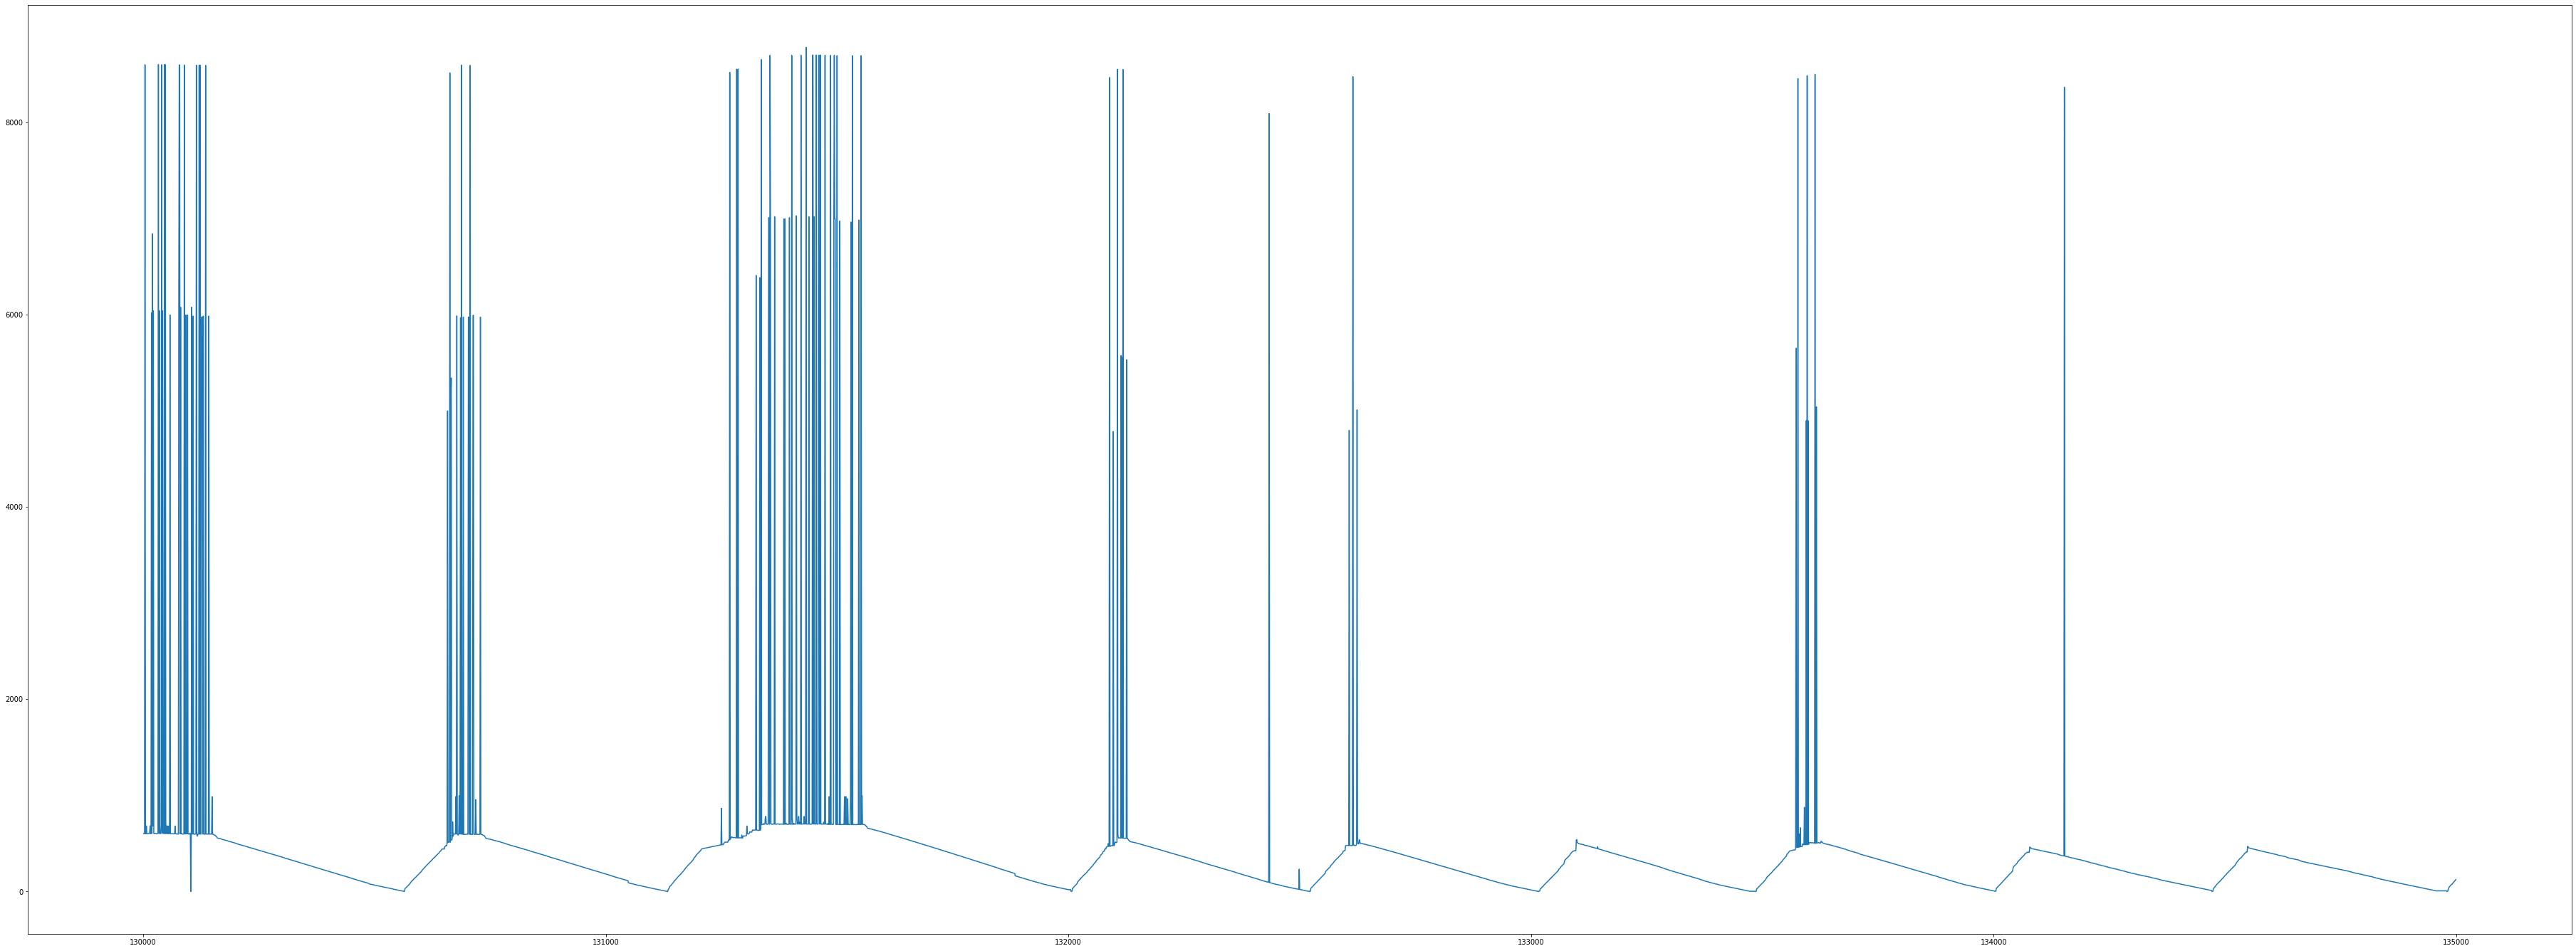

In [3]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][130001:135000])

# MELT_WEIGHT 1차 전처리

In [4]:
for i in range(len(df)):
    if df['MELT_WEIGHT'][i] >= 52727:
        df['MELT_WEIGHT'][i] = 0.01*df['MELT_WEIGHT'][i]
        
    elif 52726 >= df['MELT_WEIGHT'][i] >= 28112:
        df['MELT_WEIGHT'][i] = np.NAN
        
    elif 28111 >= df['MELT_WEIGHT'][i] >= 28078:
        df['MELT_WEIGHT'][i] = 0.1*(df['MELT_WEIGHT'][i]-8000)
        
    elif 28077 >= df['MELT_WEIGHT'][i] >= 22425:
        df['MELT_WEIGHT'][i] = np.NAN
        
    elif 22424 >= df['MELT_WEIGHT'][i] >= 10000:
        df['MELT_WEIGHT'][i] = 0.1*df['MELT_WEIGHT'][i]
        
    elif 9999 >= df['MELT_WEIGHT'][i] >= 8946:
        df['MELT_WEIGHT'][i] = np.NAN
        
    elif 8945 >= df['MELT_WEIGHT'][i] >= 8000:
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i]-8000
        
    elif 7999 >= df['MELT_WEIGHT'][i] >= 2911:
        df['MELT_WEIGHT'][i] = 0.1*df['MELT_WEIGHT'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying 

In [5]:
max(df['MELT_WEIGHT'])

2898.0

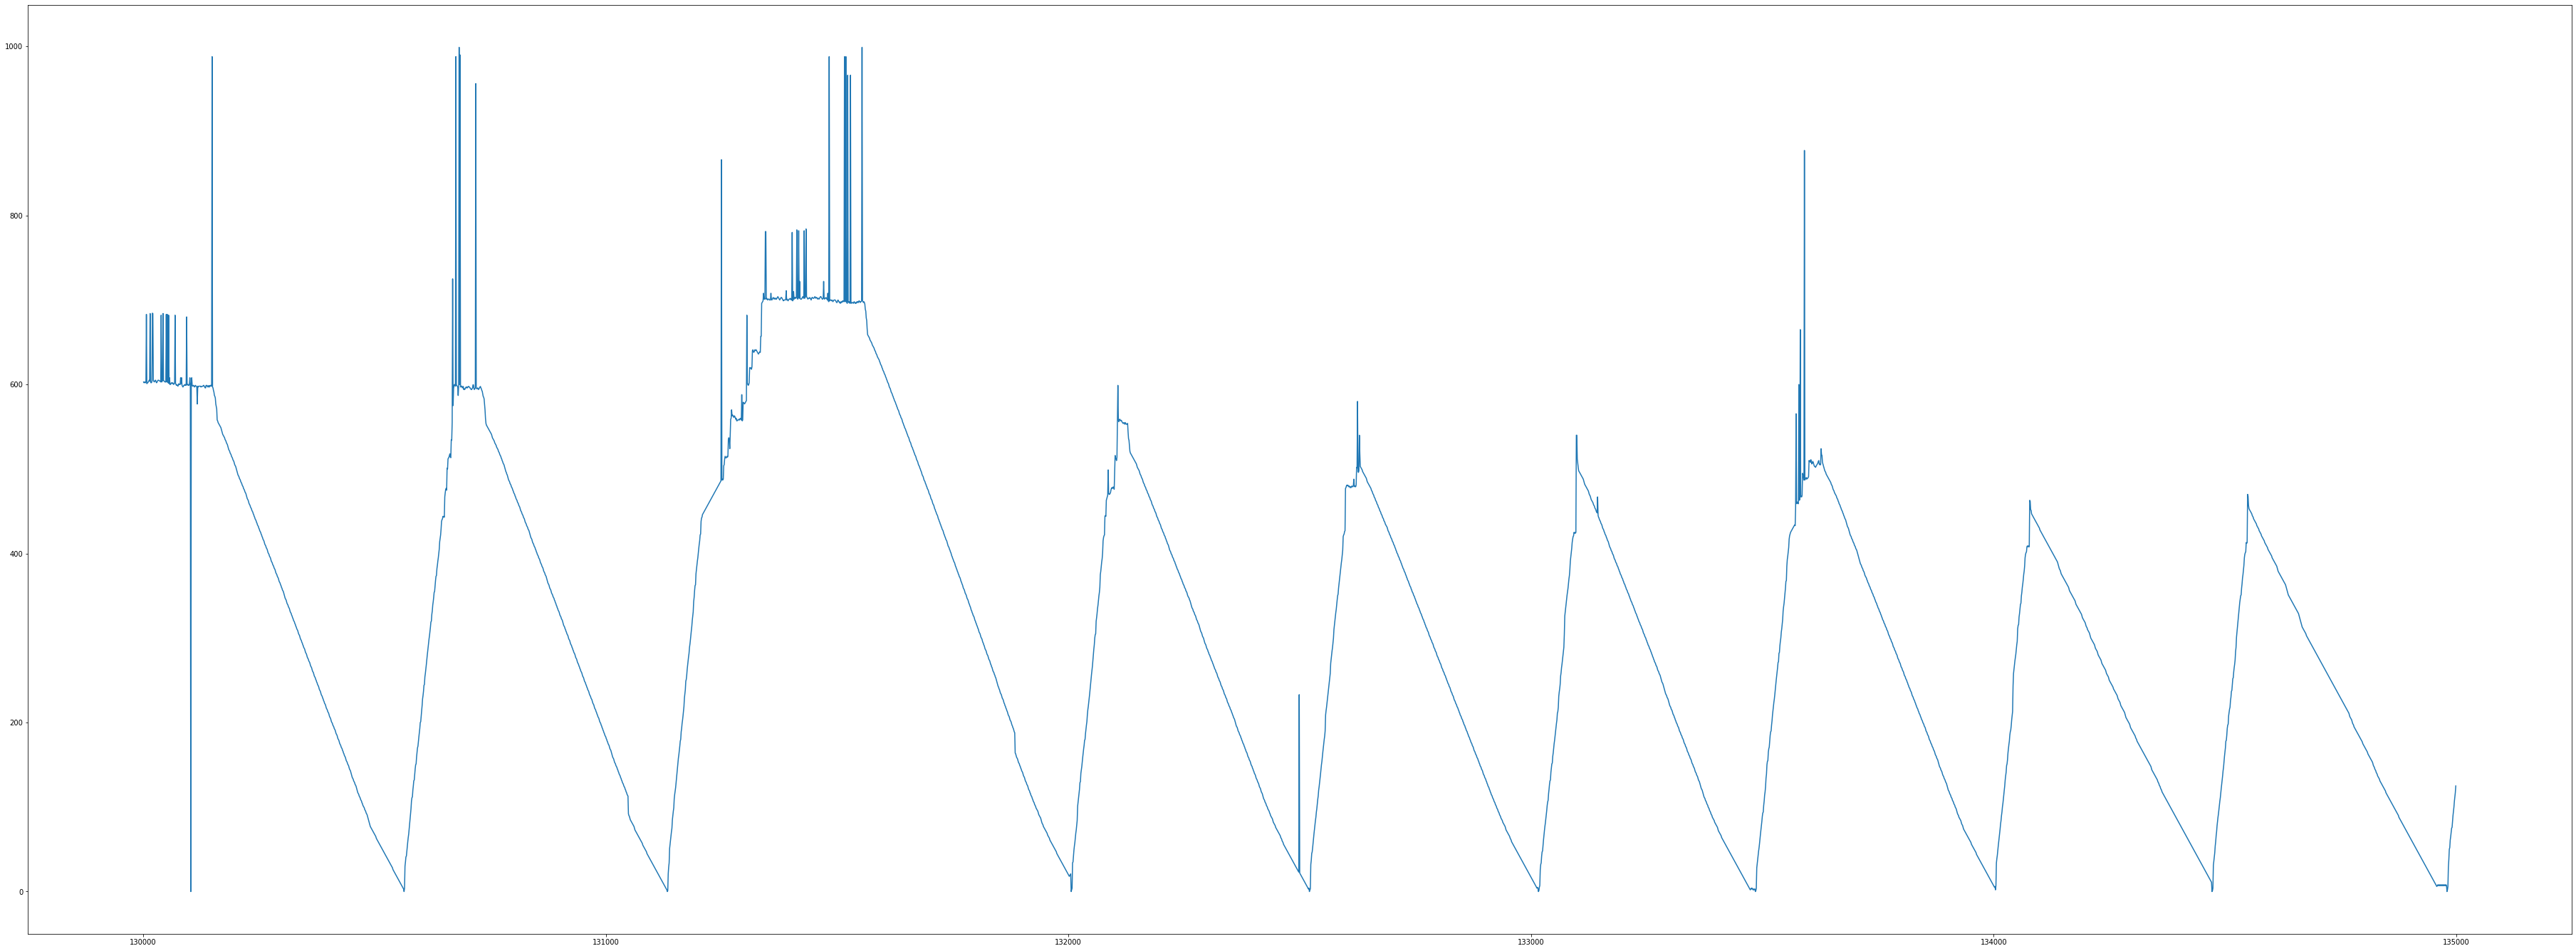

In [6]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][130001:135000])

In [7]:
df

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631.0,3.19,OK
1,2020-03-04 0:00,1,433,78,609.0,3.19,OK
2,2020-03-04 0:00,2,464,154,608.0,3.19,OK
3,2020-03-04 0:00,3,379,212,606.0,3.19,OK
4,2020-03-04 0:00,4,798,1736,604.0,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318.0,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317.0,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316.0,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314.0,3.19,OK


# MELT_WEIGHT 2차 전처리

In [8]:
# 2차-1 4분위수 활용 
# Q3+1.5*IQR 이상 Q1-1.5*IQR 이하 null 처리
for i in range(0, len(df), 100):
    eda_2 = df['MELT_WEIGHT'].loc[i:i+99]
    q1 = eda_2.describe()['25%']
    q3 = eda_2.describe()['75%']
    iqr = q3 - q1
    lowest = q1 - 1.5*iqr
    highest = q3 + 1.5*iqr
    for j in range(len(eda_2)):
        if df['MELT_WEIGHT'][i+j] > highest:
            df['MELT_WEIGHT'][i+j] = np.NAN
        
        elif df['MELT_WEIGHT'][i+j] < lowest:
            df['MELT_WEIGHT'][i+j] = np.NAN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
df

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631.0,3.19,OK
1,2020-03-04 0:00,1,433,78,609.0,3.19,OK
2,2020-03-04 0:00,2,464,154,608.0,3.19,OK
3,2020-03-04 0:00,3,379,212,606.0,3.19,OK
4,2020-03-04 0:00,4,798,1736,604.0,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318.0,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317.0,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316.0,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314.0,3.19,OK


In [10]:
df['MELT_WEIGHT'].isna().sum()

15138

In [11]:
# 2차-2 null data를 앞, 뒤 data의 평균값으로 대체
for i in range(1, len(df)-1):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = (df['MELT_WEIGHT'][i-1] + df['MELT_WEIGHT'][i+1])/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
df['MELT_WEIGHT'].isna().sum()

7629

In [13]:
# 2차-3 null data를 앞 data의 값으로 대체
for i in range(1, len(df)):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
df['MELT_WEIGHT'].isna().sum()

0

In [15]:
# 2차-4 null data를 뒤 data의 값으로 대체
for i in range(0, len(df)-1):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i+1]

In [16]:
df['MELT_WEIGHT'].isna().sum()

0

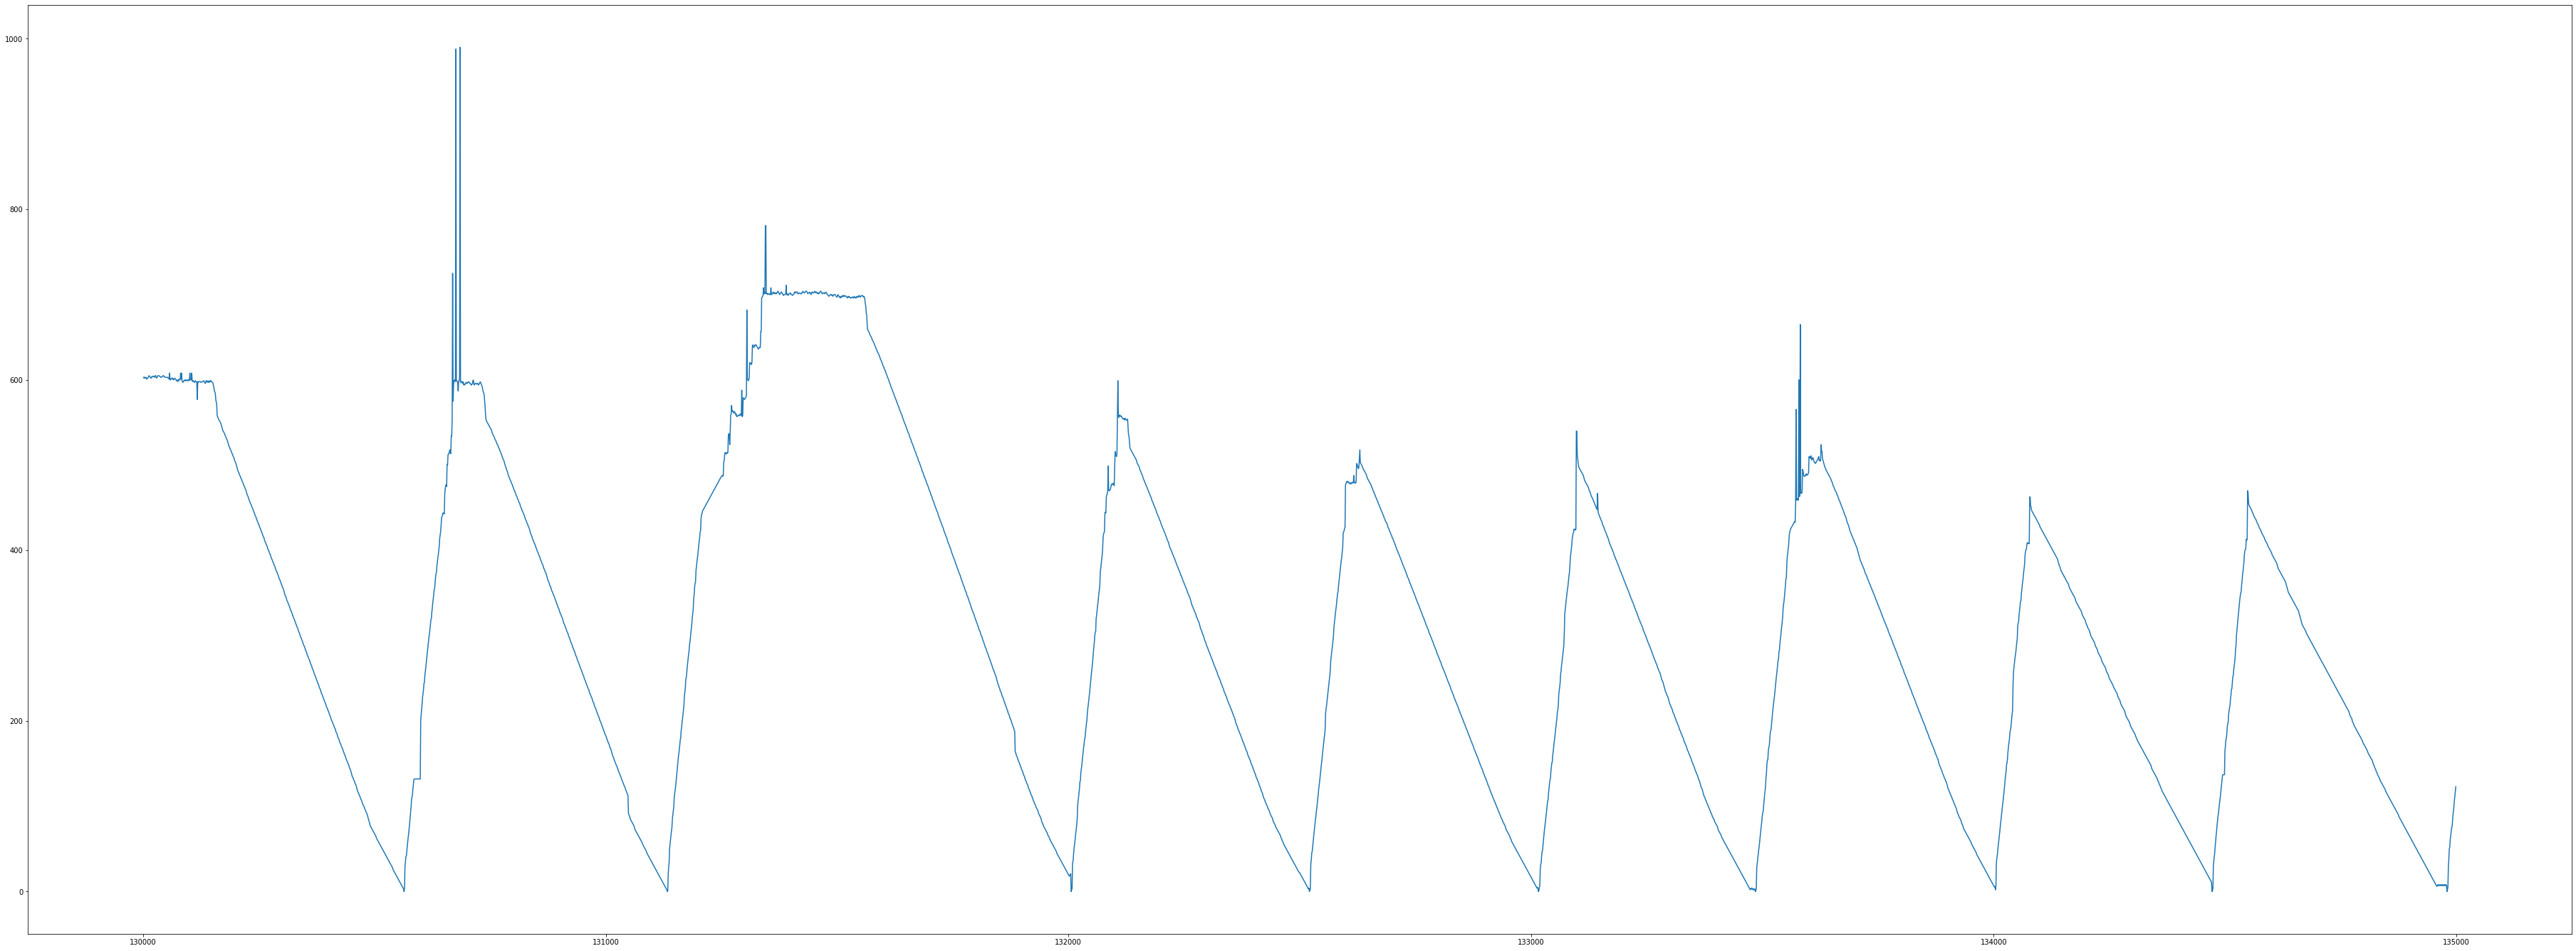

In [17]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][130001:135000])

# MELT_WEIGHT 3차 전처리

In [18]:
# MELT_WEIGHT data 한 칸씩 이동
df['MELT_WEIGHT_SHIFT'] = df['MELT_WEIGHT'].shift(1)
df

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG,MELT_WEIGHT_SHIFT
0,2020-03-04 0:00,0,489,116,631.0,3.19,OK,NaN
1,2020-03-04 0:00,1,433,78,609.0,3.19,OK,631.0
2,2020-03-04 0:00,2,464,154,608.0,3.19,OK,609.0
3,2020-03-04 0:00,3,379,212,606.0,3.19,OK,608.0
4,2020-03-04 0:00,4,798,1736,604.0,3.21,OK,606.0
...,...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318.0,3.21,OK,319.0
835196,2020-04-30 23:59,835196,385,206,317.0,3.19,OK,318.0
835197,2020-04-30 23:59,835197,465,148,316.0,3.20,OK,317.0
835198,2020-04-30 23:59,835198,467,0,314.0,3.19,OK,316.0


In [19]:
# MELT_WEIGHT 원래 data와 이동 data 차이 column 생성
df['diff'] = df['MELT_WEIGHT'] - df['MELT_WEIGHT_SHIFT']
df

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG,MELT_WEIGHT_SHIFT,diff
0,2020-03-04 0:00,0,489,116,631.0,3.19,OK,NaN,NaN
1,2020-03-04 0:00,1,433,78,609.0,3.19,OK,631.0,-22.0
2,2020-03-04 0:00,2,464,154,608.0,3.19,OK,609.0,-1.0
3,2020-03-04 0:00,3,379,212,606.0,3.19,OK,608.0,-2.0
4,2020-03-04 0:00,4,798,1736,604.0,3.21,OK,606.0,-2.0
...,...,...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318.0,3.21,OK,319.0,-1.0
835196,2020-04-30 23:59,835196,385,206,317.0,3.19,OK,318.0,-1.0
835197,2020-04-30 23:59,835197,465,148,316.0,3.20,OK,317.0,-1.0
835198,2020-04-30 23:59,835198,467,0,314.0,3.19,OK,316.0,-2.0


In [20]:
# 3차-1 차이가 1000보다 크거나 -1000보다 작으면 null 값으로 대체
for i in range(1, len(df)):
    if df['diff'][i] >= 1000:
        df['MELT_WEIGHT'][i] = np.NAN
        
    elif df['diff'][i] <= -1000:
        df['MELT_WEIGHT'][i] = np.NAN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
df['MELT_WEIGHT'].isna().sum()

29

In [22]:
# 3차-2 null data를 앞, 뒤 data의 평균값으로 대체
for i in range(1, len(df)-1):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = (df['MELT_WEIGHT'][i-1] + df['MELT_WEIGHT'][i+1])/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
df['MELT_WEIGHT'].isna().sum()

14

In [24]:
# 3차-3 null data를 앞 data의 평균값으로 대체
for i in range(1, len(df)):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
df['MELT_WEIGHT'].isna().sum()

0

In [26]:
# 3차-4 null data를 뒤 data의 값으로 대체
for i in range(0, len(df)-1):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i+1]

In [27]:
df['MELT_WEIGHT'].isna().sum()

0

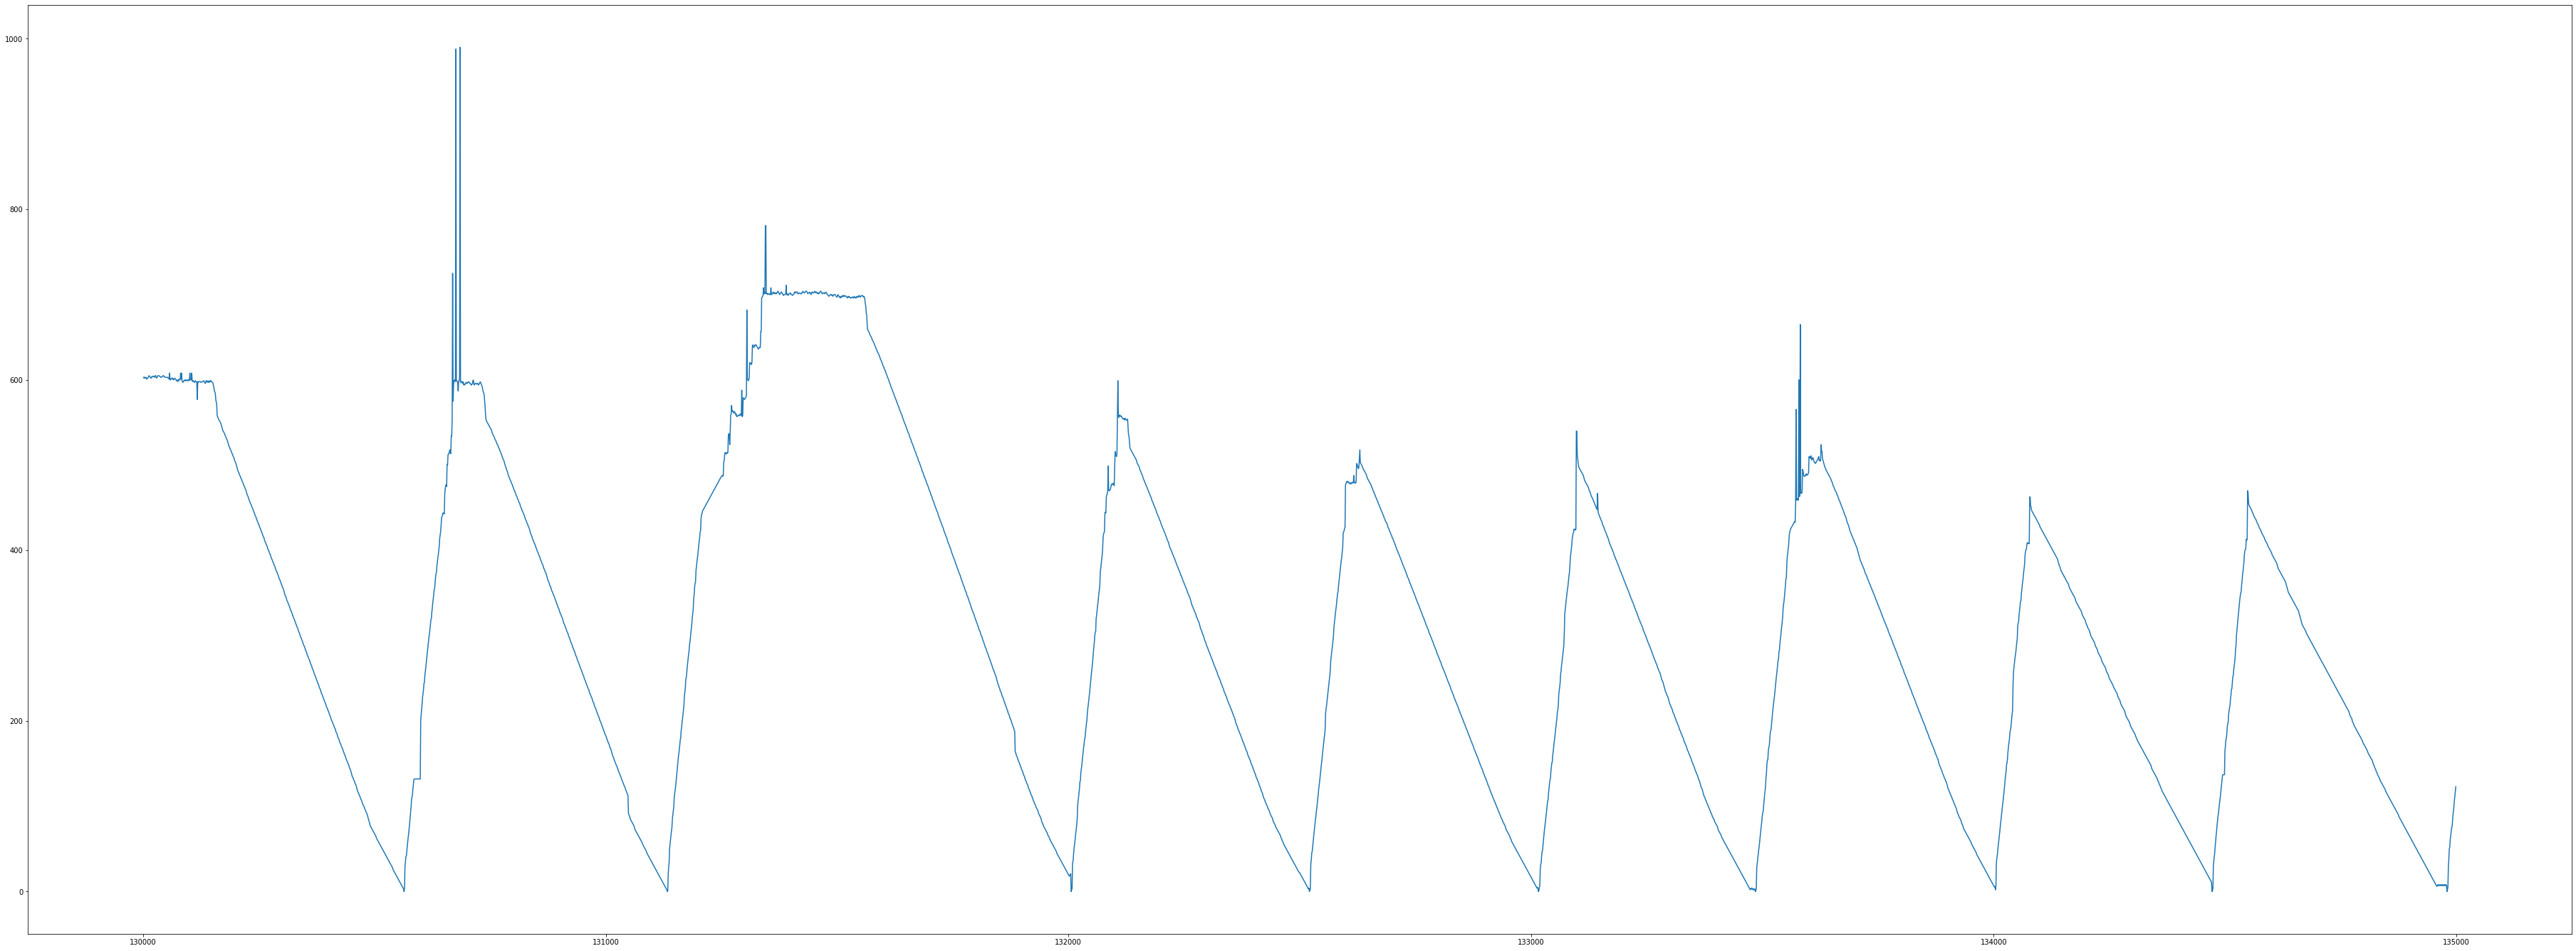

In [28]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][130001:135000])

# 생산로트 군집화

In [29]:
zero_point = df.index[df['MELT_WEIGHT'] == 0].tolist()
zero_point

[406,
 445,
 908,
 1406,
 1408,
 2540,
 3034,
 3538,
 4062,
 4586,
 5081,
 5580,
 6103,
 6645,
 7147,
 7658,
 8143,
 8673,
 9280,
 9884,
 10494,
 11065,
 11067,
 11668,
 12243,
 12807,
 13361,
 13957,
 14550,
 15163,
 15772,
 16364,
 16939,
 17517,
 18093,
 18648,
 19222,
 19743,
 20269,
 20889,
 21497,
 22074,
 22676,
 23310,
 23920,
 23922,
 24520,
 25135,
 25927,
 26507,
 27064,
 27597,
 28144,
 28678,
 29203,
 29760,
 30302,
 30845,
 31881,
 32431,
 32929,
 33437,
 33980,
 34469,
 35140,
 35683,
 36174,
 36715,
 37290,
 37833,
 38359,
 38936,
 38937,
 39607,
 40198,
 40804,
 41904,
 42499,
 43094,
 43698,
 44311,
 44917,
 44918,
 44919,
 45552,
 46124,
 46739,
 47348,
 47951,
 48562,
 49175,
 49805,
 50433,
 51076,
 51701,
 52330,
 52941,
 53563,
 54145,
 54736,
 55352,
 55354,
 55952,
 56547,
 57703,
 57705,
 58298,
 58880,
 59463,
 60068,
 60642,
 61259,
 61857,
 61859,
 62464,
 63674,
 64273,
 64855,
 65434,
 66011,
 66627,
 67214,
 67771,
 68324,
 68872,
 69415,
 69977,
 70609,

In [30]:
st = 0
li = []
for i in range(len(zero_point)):
    globals()['rot_'+str(i+1)] = df.loc[st:zero_point[i]-1]
    li.append('rot_'+str(i+1))
    st = zero_point[i]
globals()['rot_'+str(len(zero_point)+1)] = df.loc[zero_point[-1]:]
li.append('rot_'+str(len(zero_point)+1))

In [31]:
print(len(li))
print(rot_1422)

1472
                 STD_DT     NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG  \
811096  2020-04-29 7:49  811096        403         197          0.0  3.19  OK   
811097  2020-04-29 7:49  811097        446         192          4.0  3.19  OK   
811098  2020-04-29 7:49  811098        407          85         37.0  3.19  OK   
811099  2020-04-29 7:49  811099        487         155         46.0  3.20  OK   
811100  2020-04-29 7:50  811100        490         147         52.0  3.20  OK   
...                 ...     ...        ...         ...          ...   ...  ..   
811577  2020-04-29 8:37  811577        472         163         11.0  3.19  OK   
811578  2020-04-29 8:37  811578        477          70         12.0  3.19  OK   
811579  2020-04-29 8:37  811579        470         146         12.0  3.20  OK   
811580  2020-04-29 8:38  811580        495         125         11.0  3.19  OK   
811581  2020-04-29 8:38  811581        469           0         12.0  3.19  OK   

        MELT_WEIGHT_SH

In [34]:
len(li)

1472

In [ ]:
zero_point = df.index[df['MELT_WEIGHT'] == 0].tolist()
zero_point

st = 0
li = []
for i in range(len(zero_point)):
    globals()['rot_'+str(i+1)] = df.loc[st:zero_point[i]-1]
    li.append('rot_'+str(i+1))
    st = zero_point[i]
globals()['rot_'+str(len(zero_point)+1)] = df.loc[zero_point[-1]:]
li.append('rot_'+str(len(zero_point)+1))

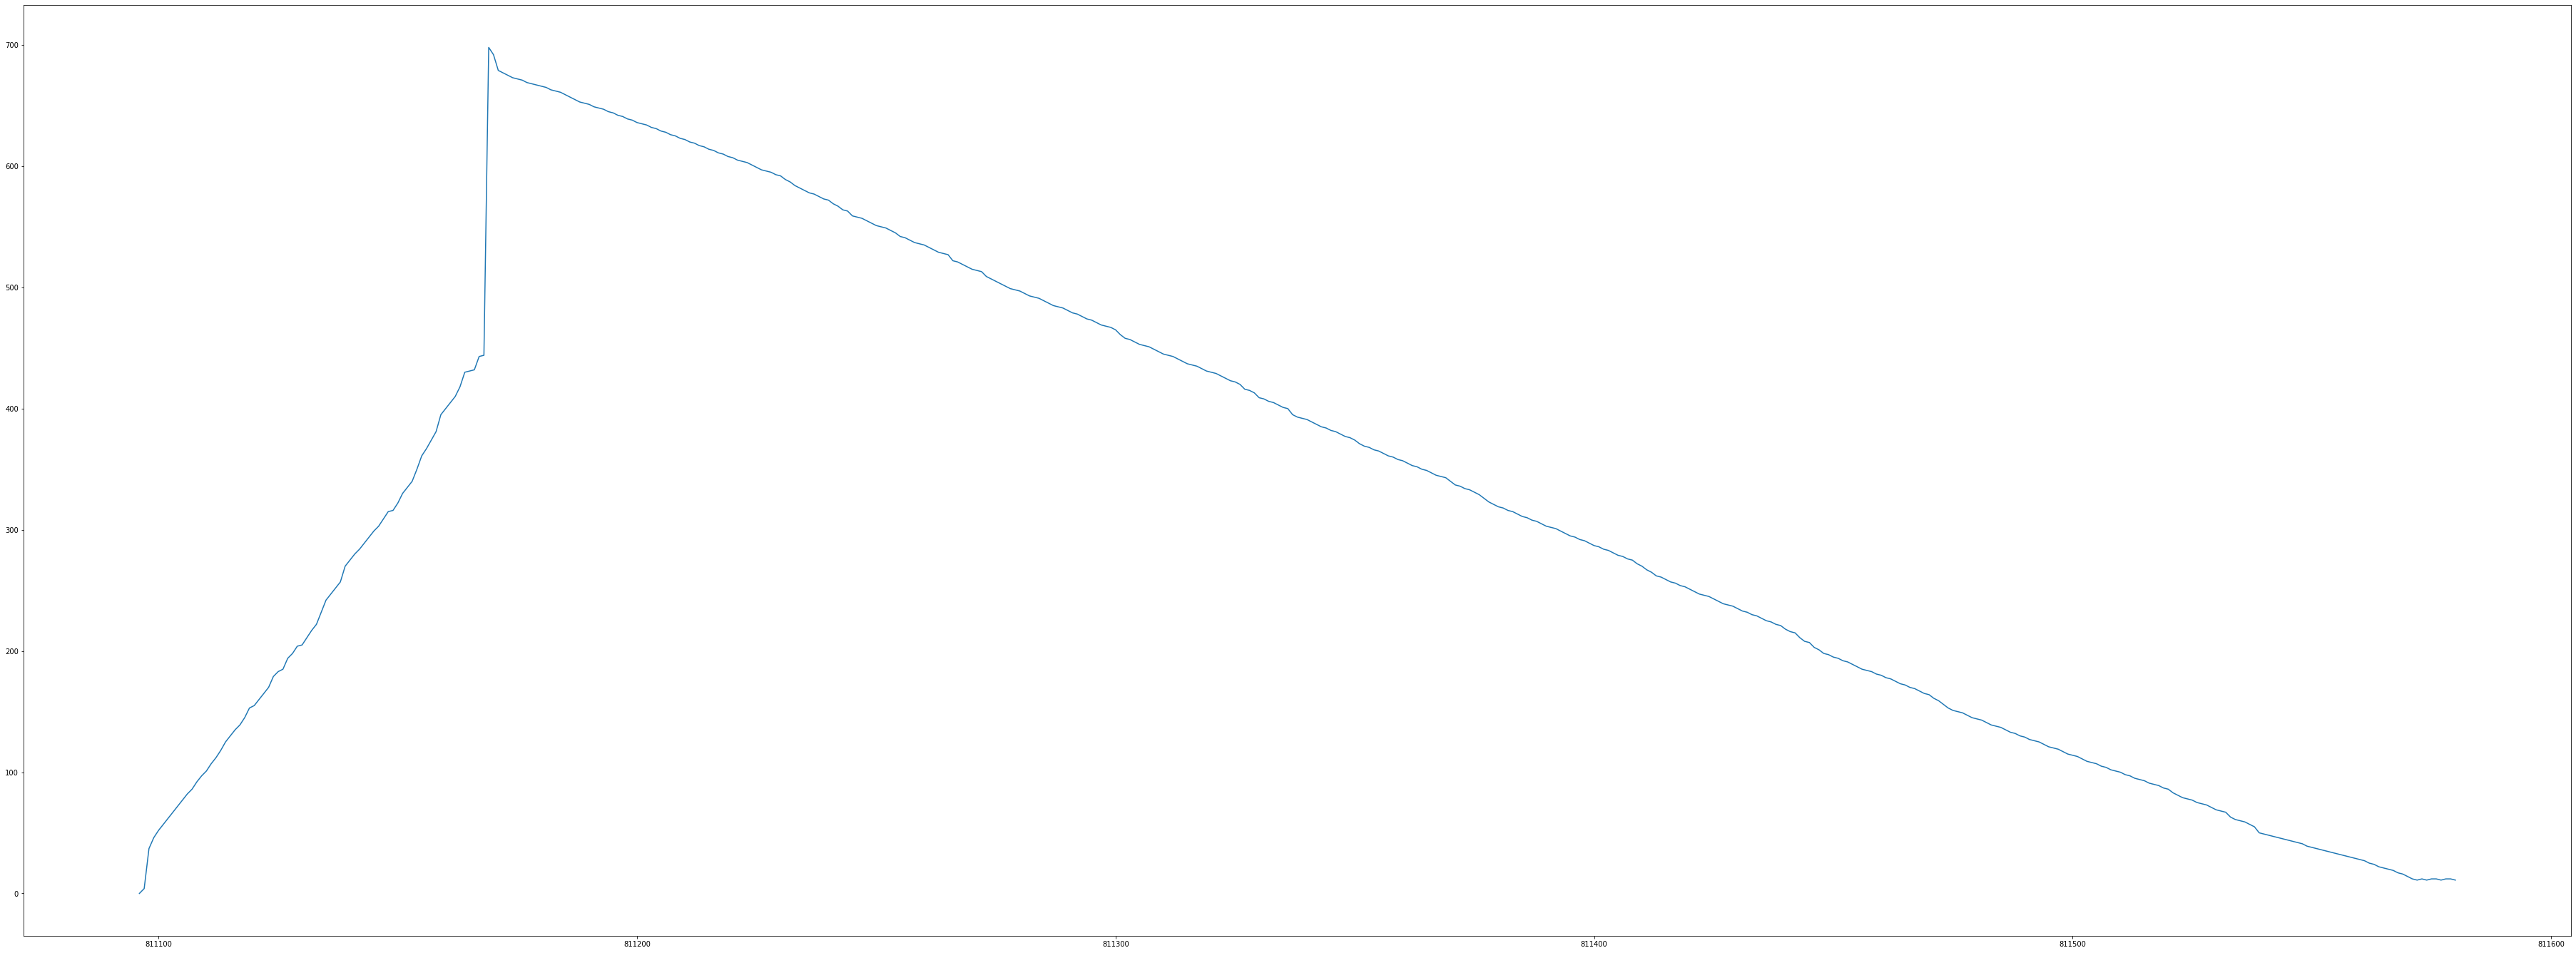

In [35]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][811096:811581])